## LSTM

In [1]:
#standard imports and assertions
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
# to get same results across runs
np.random.seed(87)

In [2]:
import tensorflow as tf
from tensorflow import keras

import time
start = time.time() #for timing the program

Load the participants' data

In [3]:
#participants' data
data1 = pd.read_csv("participant1_marks.csv")
data2 = pd.read_csv("participant2_marks.csv")
data3 = pd.read_csv("participant3_marks.csv")
data4 = pd.read_csv("participant4_marks.csv")
data5 = pd.read_csv("participant5_marks.csv")
data6 = pd.read_csv("participant6_marks.csv")
data7 = pd.read_csv("participant7_marks.csv")
data8 = pd.read_csv("participant8_marks.csv")
data9 = pd.read_csv("participant9_marks.csv")
data10 = pd.read_csv("participant10_marks.csv")
data11 = pd.read_csv("participant11_marks.csv")
data12 = pd.read_csv("participant12_marks.csv")
data13 = pd.read_csv("participant13_marks.csv")
data14 = pd.read_csv("participant14_marks.csv")
data15 = pd.read_csv("participant15_marks.csv")
data16 = pd.read_csv("participant16_marks.csv")
part_data = [data1, data2, data3, data4, data5, data6, data7, data8,
             data9, data10, data11, data12, data13, data14, data15, data16]

Stimuli

In [4]:
stimuli = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

Duration of each excerpt

In [5]:
#time in seconds of each stimulus
s0 = 100
s1 = 83
s2 = 73
s3 = 146
s4 = 136
s5 = 101
s6 = 85
s7 = 117
s8 = 75
s9 = 89

total_secs = [s0, s1, s2, s3, s4, s5, s6, s7, s8, s9] #times in seconds for every stimulus

Load each of the excerpts' acoustic features

In [6]:
excerpt1 = pd.read_csv("excerpt1_features.csv")
excerpt2 = pd.read_csv("excerpt2_features.csv")
excerpt3 = pd.read_csv("excerpt3_features.csv")
excerpt4 = pd.read_csv("excerpt4_features.csv")
excerpt5 = pd.read_csv("excerpt5_features.csv")
excerpt6 = pd.read_csv("excerpt6_features.csv")
excerpt7 = pd.read_csv("excerpt7_features.csv")
excerpt8 = pd.read_csv("excerpt8_features.csv")
excerpt9 = pd.read_csv("excerpt9_features.csv")
excerpt10 = pd.read_csv("excerpt10_features.csv")
excerpt_features = [excerpt1,excerpt2,excerpt3,excerpt4,excerpt5,excerpt6,excerpt7,excerpt8,excerpt9,excerpt10]

Organize the data from the Participants to be the target array

In [7]:
dat = part_data[0]
arr0 = []
st = stimuli[1]
arr0_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr0_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr0_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr0_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr0_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr0_0.append(1)
    else:
        arr0_0.append(0)

st = stimuli[3]
arr0_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr0_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr0_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr0_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr0_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr0_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr0_1.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr0_1.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr0_1.append(1)
    else:
        arr0_1.append(0)

st = stimuli[5]
arr0_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr0_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr0_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr0_2.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr0_2.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr0_2.append(1)
    else:
        arr0_2.append(0)

st = stimuli[7]
arr0_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr0_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr0_3.append(1)
    else:
        arr0_3.append(0)

st = stimuli[9]
arr0_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr0_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr0_4.append(1)
    else:
        arr0_4.append(0)

st = stimuli[11]
arr0_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr0_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr0_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr0_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr0_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr0_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr0_5.append(1)
    else:
        arr0_5.append(0)

st = stimuli[13]
arr0_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr0_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr0_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr0_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr0_6.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr0_6.append(1)
    else:
        arr0_6.append(0)

st = stimuli[15]
arr0_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr0_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr0_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr0_7.append(1)
    else:
        arr0_7.append(0)

st = stimuli[17]
arr0_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr0_8.append(1)
    else:
        arr0_8.append(0)
        
st = stimuli[19]
arr0_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr0_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr0_9.append(1)
    else:
        arr0_9.append(0)

arr0.append(arr0_0)
arr0.append(arr0_1)
arr0.append(arr0_2)
arr0.append(arr0_3)
arr0.append(arr0_4)
arr0.append(arr0_5)
arr0.append(arr0_6)
arr0.append(arr0_7)
arr0.append(arr0_8)
arr0.append(arr0_9)

In [8]:
dat = part_data[1]
arr1 = []
st = stimuli[1]
arr1_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr1_0.append(1)
    else:
        arr1_0.append(0)

st = stimuli[3]
arr1_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_1.append(1)
    else:
        arr1_1.append(0)

st = stimuli[5]
arr1_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr1_2.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr1_2.append(1)
    else:
        arr1_2.append(0)

st = stimuli[7]
arr1_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][17]-1 and (m*0.25) <= dat[st][17]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][18]-1 and (m*0.25) <= dat[st][18]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][19]-1 and (m*0.25) <= dat[st][19]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][20]-1 and (m*0.25) <= dat[st][20]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][21]-1 and (m*0.25) <= dat[st][21]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][22]-1 and (m*0.25) <= dat[st][22]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][23]-1 and (m*0.25) <= dat[st][23]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][24]-1 and (m*0.25) <= dat[st][24]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][25]-1 and (m*0.25) <= dat[st][25]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][26]-1 and (m*0.25) <= dat[st][26]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][27]-1 and (m*0.25) <= dat[st][27]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][28]-1 and (m*0.25) <= dat[st][28]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][29]-1 and (m*0.25) <= dat[st][29]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][30]-1 and (m*0.25) <= dat[st][30]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][31]-1 and (m*0.25) <= dat[st][31]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][32]-1 and (m*0.25) <= dat[st][32]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][33]-1 and (m*0.25) <= dat[st][33]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][34]-1 and (m*0.25) <= dat[st][34]+1:
        arr1_3.append(1)
    elif (m*0.25) >= dat[st][35]-1 and (m*0.25) <= dat[st][35]+1:
        arr1_3.append(1)
    else:
        arr1_3.append(0)

st = stimuli[8]
arr1_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr1_4.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr1_4.append(1)
    else:
        arr1_4.append(0)

st = stimuli[11]
arr1_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr1_5.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr1_5.append(1)
    else:
        arr1_5.append(0)

st = stimuli[13]
arr1_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr1_6.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr1_6.append(1)
    else:
        arr1_6.append(0)

st = stimuli[15]
arr1_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][17]-1 and (m*0.25) <= dat[st][17]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][18]-1 and (m*0.25) <= dat[st][18]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][19]-1 and (m*0.25) <= dat[st][19]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][20]-1 and (m*0.25) <= dat[st][20]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][21]-1 and (m*0.25) <= dat[st][21]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][22]-1 and (m*0.25) <= dat[st][22]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][23]-1 and (m*0.25) <= dat[st][23]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][24]-1 and (m*0.25) <= dat[st][24]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][25]-1 and (m*0.25) <= dat[st][25]+1:
        arr1_7.append(1)
    elif (m*0.25) >= dat[st][26]-1 and (m*0.25) <= dat[st][26]+1:
        arr1_7.append(1)
    else:
        arr1_7.append(0)

st = stimuli[17]
arr1_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr1_8.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr1_8.append(1)
    else:
        arr1_8.append(0)
        
st = stimuli[19]
arr1_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][17]-1 and (m*0.25) <= dat[st][17]+1:
        arr1_9.append(1)
    elif (m*0.25) >= dat[st][18]-1 and (m*0.25) <= dat[st][18]+1:
        arr1_9.append(1)
    else:
        arr1_9.append(0)

arr1.append(arr1_0)
arr1.append(arr1_1)
arr1.append(arr1_2)
arr1.append(arr1_3)
arr1.append(arr1_4)
arr1.append(arr1_5)
arr1.append(arr1_6)
arr1.append(arr1_7)
arr1.append(arr1_8)
arr1.append(arr1_9)

In [9]:
dat = part_data[2]
arr2 = []
st = stimuli[1]
arr2_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_0.append(1)
    else:
        arr2_0.append(0)

st = stimuli[3]
arr2_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr2_1.append(1)
    else:
        arr2_1.append(0)

st = stimuli[5]
arr2_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr2_2.append(1)
    else:
        arr2_2.append(0)

st = stimuli[7]
arr2_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][17]-1 and (m*0.25) <= dat[st][17]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][18]-1 and (m*0.25) <= dat[st][18]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][19]-1 and (m*0.25) <= dat[st][19]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][20]-1 and (m*0.25) <= dat[st][20]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][21]-1 and (m*0.25) <= dat[st][21]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][22]-1 and (m*0.25) <= dat[st][22]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][23]-1 and (m*0.25) <= dat[st][23]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][24]-1 and (m*0.25) <= dat[st][24]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][25]-1 and (m*0.25) <= dat[st][25]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][26]-1 and (m*0.25) <= dat[st][26]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][27]-1 and (m*0.25) <= dat[st][27]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][28]-1 and (m*0.25) <= dat[st][28]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][29]-1 and (m*0.25) <= dat[st][29]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][30]-1 and (m*0.25) <= dat[st][30]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][31]-1 and (m*0.25) <= dat[st][31]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][32]-1 and (m*0.25) <= dat[st][32]+1:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][33]-1 and (m*0.25) <= dat[st][33]+1:
        arr2_3.append(1)
    else:
        arr2_3.append(0)

st = stimuli[8]
arr2_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr2_4.append(1)
    else:
        arr2_4.append(0)

st = stimuli[11]
arr2_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr2_5.append(1)
    else:
        arr2_5.append(0)

st = stimuli[13]
arr2_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr2_6.append(1)
    else:
        arr2_6.append(0)

st = stimuli[15]
arr2_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr2_7.append(1)
    else:
        arr2_7.append(0)

st = stimuli[17]
arr2_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_8.append(1)
    else:
        arr2_8.append(0)
        
st = stimuli[19]
arr2_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr2_9.append(1)
    else:
        arr2_9.append(0)

arr2.append(arr2_0)
arr2.append(arr2_1)
arr2.append(arr2_2)
arr2.append(arr2_3)
arr2.append(arr2_4)
arr2.append(arr2_5)
arr2.append(arr2_6)
arr2.append(arr2_7)
arr2.append(arr2_8)
arr2.append(arr2_9)

In [10]:
dat = part_data[3]
arr3 = []
st = stimuli[1]
arr3_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_0.append(1)
    else:
        arr3_0.append(0)

st = stimuli[3]
arr3_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr3_1.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr3_1.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr3_1.append(1)
    else:
        arr3_1.append(0)

st = stimuli[5]
arr3_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_2.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_2.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_2.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr3_2.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr3_2.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr3_2.append(1)
    else:
        arr3_2.append(0)

st = stimuli[7]
arr3_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr3_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr3_3.append(1)
    else:
        arr3_3.append(0)

st = stimuli[9]
arr3_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_4.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr3_4.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr3_4.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr3_4.append(1)
    else:
        arr3_4.append(0)

st = stimuli[11]
arr3_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr3_5.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr3_5.append(1)
    else:
        arr3_5.append(0)

st = stimuli[13]
arr3_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr3_6.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr3_6.append(1)
    else:
        arr3_6.append(0)

st = stimuli[15]
arr3_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr3_7.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr3_7.append(1)
    else:
        arr3_7.append(0)

st = stimuli[17]
arr3_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr3_8.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr3_8.append(1)
    else:
        arr3_8.append(0)
        
st = stimuli[19]
arr3_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr3_9.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr3_9.append(1)
    else:
        arr3_9.append(0)

arr3.append(arr3_0)
arr3.append(arr3_1)
arr3.append(arr3_2)
arr3.append(arr3_3)
arr3.append(arr3_4)
arr3.append(arr3_5)
arr3.append(arr3_6)
arr3.append(arr3_7)
arr3.append(arr3_8)
arr3.append(arr3_9)

In [11]:
dat = part_data[4]
arr4 = []
st = stimuli[1]
arr4_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_0.append(1)
    else:
        arr4_0.append(0)

st = stimuli[3]
arr4_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr4_1.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr4_1.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr4_1.append(1)
    else:
        arr4_1.append(0)

st = stimuli[5]
arr4_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_2.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_2.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_2.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr4_2.append(1)
    else:
        arr4_2.append(0)

st = stimuli[7]
arr4_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][17]-1 and (m*0.25) <= dat[st][17]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][18]-1 and (m*0.25) <= dat[st][18]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][19]-1 and (m*0.25) <= dat[st][19]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][20]-1 and (m*0.25) <= dat[st][20]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][21]-1 and (m*0.25) <= dat[st][21]+1:
        arr4_3.append(1)
    elif (m*0.25) >= dat[st][22]-1 and (m*0.25) <= dat[st][22]+1:
        arr4_3.append(1)
    else:
        arr4_3.append(0)

st = stimuli[9]
arr4_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_4.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr4_4.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr4_4.append(1)
    else:
        arr4_4.append(0)

st = stimuli[11]
arr4_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr4_5.append(1)
    else:
        arr4_5.append(0)

st = stimuli[13]
arr4_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_6.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_6.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr4_6.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr4_6.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr4_6.append(1)
    else:
        arr4_6.append(0)

st = stimuli[15]
arr4_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr4_7.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr4_7.append(1)
    else:
        arr4_7.append(0)

st = stimuli[17]
arr4_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_8.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_8.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_8.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_8.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr4_8.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr4_8.append(1)
    else:
        arr4_8.append(0)
        
st = stimuli[19]
arr4_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr4_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr4_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr4_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr4_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr4_9.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr4_9.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr4_9.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr4_9.append(1)
    else:
        arr4_9.append(0)

arr4.append(arr4_0)
arr4.append(arr4_1)
arr4.append(arr4_2)
arr4.append(arr4_3)
arr4.append(arr4_4)
arr4.append(arr4_5)
arr4.append(arr4_6)
arr4.append(arr4_7)
arr4.append(arr4_8)
arr4.append(arr4_9)

In [12]:
dat = part_data[5]
arr5 = []
st = stimuli[1]
arr5_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr5_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr5_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr5_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr5_0.append(1)
    else:
        arr5_0.append(0)

st = stimuli[3]
arr5_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr5_1.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr5_1.append(1)
    else:
        arr5_1.append(0)

st = stimuli[5]
arr5_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr5_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr5_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr5_2.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr5_2.append(1)
    else:
        arr5_2.append(0)

st = stimuli[7]
arr5_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr5_3.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr5_3.append(1)
    else:
        arr5_3.append(0)

st = stimuli[9]
arr5_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr5_4.append(1)
    else:
        arr5_4.append(0)

st = stimuli[11]
arr5_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr5_5.append(1)
    else:
        arr5_5.append(0)

st = stimuli[13]
arr5_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr5_6.append(1)
    else:
        arr5_6.append(0)

st = stimuli[15]
arr5_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_7.append(1)
    else:
        arr5_7.append(0)

st = stimuli[17]
arr5_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr5_8.append(1)
    else:
        arr5_8.append(0)
        
st = stimuli[19]
arr5_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr5_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr5_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr5_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr5_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr5_9.append(1)
    else:
        arr5_9.append(0)

arr5.append(arr5_0)
arr5.append(arr5_1)
arr5.append(arr5_2)
arr5.append(arr5_3)
arr5.append(arr5_4)
arr5.append(arr5_5)
arr5.append(arr5_6)
arr5.append(arr5_7)
arr5.append(arr5_8)
arr5.append(arr5_9)

In [13]:
dat = part_data[6]
arr6 = []
st = stimuli[1]
arr6_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][5]-4 and (m*0.25) <= dat[st][5]+4:
        arr6_0.append(1)
    else:
        arr6_0.append(0)

st = stimuli[3]
arr6_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_1.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_1.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_1.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr6_1.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr6_1.append(1)
    else:
        arr6_1.append(0)

st = stimuli[5]
arr6_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_2.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_2.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_2.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr6_2.append(1)
    else:
        arr6_2.append(0)

st = stimuli[7]
arr6_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][5]-4 and (m*0.25) <= dat[st][5]+4:
        arr6_3.append(1)
    else:
        arr6_3.append(0)

st = stimuli[9]
arr6_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_4.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_4.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_4.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr6_4.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr6_4.append(1)
    else:
        arr6_4.append(0)

st = stimuli[11]
arr6_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_5.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_5.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_5.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr6_5.append(1)
    else:
        arr6_5.append(0)

st = stimuli[13]
arr6_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_6.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_6.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_6.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr6_6.append(1)
    else:
        arr6_6.append(0)

st = stimuli[15]
arr6_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_7.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_7.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_7.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr6_7.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr6_7.append(1)
    else:
        arr6_7.append(0)

st = stimuli[17]
arr6_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][5]-4 and (m*0.25) <= dat[st][5]+4:
        arr6_8.append(1)
    else:
        arr6_8.append(0)
        
st = stimuli[19]
arr6_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr6_9.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr6_9.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr6_9.append(1)
    else:
        arr6_9.append(0)

arr6.append(arr6_0)
arr6.append(arr6_1)
arr6.append(arr6_2)
arr6.append(arr6_3)
arr6.append(arr6_4)
arr6.append(arr6_5)
arr6.append(arr6_6)
arr6.append(arr6_7)
arr6.append(arr6_8)
arr6.append(arr6_9)

In [14]:
dat = part_data[7]
arr7 = []
st = stimuli[1]
arr7_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][5]-4 and (m*0.25) <= dat[st][5]+4:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][6]-4 and (m*0.25) <= dat[st][6]+4:
        arr7_0.append(1)
    else:
        arr7_0.append(0)

st = stimuli[3]
arr7_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][5]-4 and (m*0.25) <= dat[st][5]+4:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][6]-4 and (m*0.25) <= dat[st][6]+4:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][7]-4 and (m*0.25) <= dat[st][7]+4:
        arr7_1.append(1)
    else:
        arr7_1.append(0)

st = stimuli[5]
arr7_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_2.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_2.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_2.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_2.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr7_2.append(1)
    else:
        arr7_2.append(0)

st = stimuli[7]
arr7_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_3.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_3.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_3.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_3.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr7_3.append(1)
    else:
        arr7_3.append(0)

st = stimuli[9]
arr7_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_4.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_4.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_4.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_4.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr7_4.append(1)
    else:
        arr7_4.append(0)

st = stimuli[11]
arr7_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][5]-4 and (m*0.25) <= dat[st][5]+4:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][6]-4 and (m*0.25) <= dat[st][6]+4:
        arr7_5.append(1)
    else:
        arr7_5.append(0)

st = stimuli[13]
arr7_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_6.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_6.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_6.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_6.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr7_6.append(1)
    else:
        arr7_6.append(0)

st = stimuli[15]
arr7_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][5]-4 and (m*0.25) <= dat[st][5]+4:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][6]-4 and (m*0.25) <= dat[st][6]+4:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][7]-4 and (m*0.25) <= dat[st][7]+4:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][8]-4 and (m*0.25) <= dat[st][8]+4:
        arr7_7.append(1)
    else:
        arr7_7.append(0)

st = stimuli[17]
arr7_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_8.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_8.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_8.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_8.append(1)
    else:
        arr7_8.append(0)
        
st = stimuli[19]
arr7_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-4 and (m*0.25) <= dat[st][0]+4:
        arr7_9.append(1)
    elif (m*0.25) >= dat[st][1]-4 and (m*0.25) <= dat[st][1]+4:
        arr7_9.append(1)
    elif (m*0.25) >= dat[st][2]-4 and (m*0.25) <= dat[st][2]+4:
        arr7_9.append(1)
    elif (m*0.25) >= dat[st][3]-4 and (m*0.25) <= dat[st][3]+4:
        arr7_9.append(1)
    elif (m*0.25) >= dat[st][4]-4 and (m*0.25) <= dat[st][4]+4:
        arr7_9.append(1)
    else:
        arr7_9.append(0)

arr7.append(arr7_0)
arr7.append(arr7_1)
arr7.append(arr7_2)
arr7.append(arr7_3)
arr7.append(arr7_4)
arr7.append(arr7_5)
arr7.append(arr7_6)
arr7.append(arr7_7)
arr7.append(arr7_8)
arr7.append(arr7_9)

In [15]:
dat = part_data[8]
arr8 = []
st = stimuli[1]
arr8_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr8_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr8_0.append(1)
    else:
        arr8_0.append(0)

st = stimuli[3]
arr8_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr8_1.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr8_1.append(1)
    else:
        arr8_1.append(0)

st = stimuli[5]
arr8_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr8_2.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr8_2.append(1)
    else:
        arr8_2.append(0)

st = stimuli[7]
arr8_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr8_3.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr8_3.append(1)
    else:
        arr8_3.append(0)

st = stimuli[9]
arr8_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_4.append(1)
    else:
        arr8_4.append(0)

st = stimuli[11]
arr8_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr8_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr8_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr8_5.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr8_5.append(1)
    else:
        arr8_5.append(0)

st = stimuli[13]
arr8_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr8_6.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr8_6.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr8_6.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr8_6.append(1)
    else:
        arr8_6.append(0)

st = stimuli[15]
arr8_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr8_7.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr8_7.append(1)
    else:
        arr8_7.append(0)

st = stimuli[17]
arr8_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_8.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_8.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr8_8.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr8_8.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr8_8.append(1)
    else:
        arr8_8.append(0)
        
st = stimuli[19]
arr8_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr8_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr8_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr8_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr8_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr8_9.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr8_9.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr8_9.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr8_9.append(1)
    else:
        arr8_9.append(0)

arr8.append(arr8_0)
arr8.append(arr8_1)
arr8.append(arr8_2)
arr8.append(arr8_3)
arr8.append(arr8_4)
arr8.append(arr8_5)
arr8.append(arr8_6)
arr8.append(arr8_7)
arr8.append(arr8_8)
arr8.append(arr8_9)

In [16]:
dat = part_data[9]
arr9 = []
st = stimuli[1]
arr9_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr9_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr9_0.append(1)
    else:
        arr9_0.append(0)

st = stimuli[3]
arr9_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr9_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr9_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr9_1.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr9_1.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr9_1.append(1)
    else:
        arr9_1.append(0)

st = stimuli[5]
arr9_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_2.append(1)
    else:
        arr9_2.append(0)

st = stimuli[7]
arr9_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][17]-1 and (m*0.25) <= dat[st][17]+1:
        arr9_3.append(1)
    elif (m*0.25) >= dat[st][18]-1 and (m*0.25) <= dat[st][18]+1:
        arr9_3.append(1)
    else:
        arr9_3.append(0)

st = stimuli[9]
arr9_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr9_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr9_4.append(1)
    else:
        arr9_4.append(0)

st = stimuli[11]
arr9_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr9_5.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr9_5.append(1)
    else:
        arr9_5.append(0)

st = stimuli[13]
arr9_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr9_6.append(1)
    else:
        arr9_6.append(0)

st = stimuli[15]
arr9_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr9_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr9_7.append(1)
    else:
        arr9_7.append(0)

st = stimuli[17]
arr9_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_8.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_8.append(1)
    else:
        arr9_8.append(0)
        
st = stimuli[19]
arr9_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr9_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr9_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr9_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr9_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr9_9.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr9_9.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr9_9.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr9_9.append(1)
    else:
        arr9_9.append(0)

arr9.append(arr9_0)
arr9.append(arr9_1)
arr9.append(arr9_2)
arr9.append(arr9_3)
arr9.append(arr9_4)
arr9.append(arr9_5)
arr9.append(arr9_6)
arr9.append(arr9_7)
arr9.append(arr9_8)
arr9.append(arr9_9)

In [17]:
dat = part_data[10]
arr10 = []
st = stimuli[1]
arr10_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr10_0.append(1)
    else:
        arr10_0.append(0)

st = stimuli[3]
arr10_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr10_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr10_1.append(1)
    else:
        arr10_1.append(0)

st = stimuli[5]
arr10_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_2.append(1)
    else:
        arr10_2.append(0)

st = stimuli[7]
arr10_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr10_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr10_3.append(1)
    else:
        arr10_3.append(0)

st = stimuli[9]
arr10_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr10_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr10_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr10_4.append(1)
    else:
        arr10_4.append(0)

st = stimuli[11]
arr10_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr10_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr10_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr10_5.append(1)
    else:
        arr10_5.append(0)

st = stimuli[13]
arr10_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_6.append(1)
    else:
        arr10_6.append(0)

st = stimuli[15]
arr10_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr10_7.append(1)
    else:
        arr10_7.append(0)

st = stimuli[17]
arr10_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr10_8.append(1)
    else:
        arr10_8.append(0)
        
st = stimuli[19]
arr10_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr10_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr10_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr10_9.append(1)
    else:
        arr10_9.append(0)

arr10.append(arr10_0)
arr10.append(arr10_1)
arr10.append(arr10_2)
arr10.append(arr10_3)
arr10.append(arr10_4)
arr10.append(arr10_5)
arr10.append(arr10_6)
arr10.append(arr10_7)
arr10.append(arr10_8)
arr10.append(arr10_9)

In [18]:
dat = part_data[11]
arr11 = []
st = stimuli[1]
arr11_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr11_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr11_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr11_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr11_0.append(1)
    else:
        arr11_0.append(0)

st = stimuli[3]
arr11_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr11_1.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr11_1.append(1)
    else:
        arr11_1.append(0)

st = stimuli[5]
arr11_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr11_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr11_2.append(1)
    else:
        arr11_2.append(0)

st = stimuli[7]
arr11_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr11_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr11_3.append(1)
    else:
        arr11_3.append(0)

st = stimuli[9]
arr11_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr11_4.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr11_4.append(1)
    else:
        arr11_4.append(0)

st = stimuli[11]
arr11_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr11_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr11_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr11_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr11_5.append(1)
    else:
        arr11_5.append(0)

st = stimuli[13]
arr11_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_6.append(1)
    else:
        arr11_6.append(0)

st = stimuli[15]
arr11_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr11_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr11_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr11_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr11_7.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr11_7.append(1)
    else:
        arr11_7.append(0)

st = stimuli[17]
arr11_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_8.append(1)
    else:
        arr11_8.append(0)
        
st = stimuli[19]
arr11_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr11_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr11_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr11_9.append(1)
    else:
        arr11_9.append(0)

arr11.append(arr11_0)
arr11.append(arr11_1)
arr11.append(arr11_2)
arr11.append(arr11_3)
arr11.append(arr11_4)
arr11.append(arr11_5)
arr11.append(arr11_6)
arr11.append(arr11_7)
arr11.append(arr11_8)
arr11.append(arr11_9)

In [19]:
dat = part_data[12]
arr12 = []
st = stimuli[1]
arr12_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr12_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr12_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr12_0.append(1)
    else:
        arr12_0.append(0)

st = stimuli[3]
arr12_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_1.append(1)
    else:
        arr12_1.append(0)

st = stimuli[5]
arr12_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr12_2.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr12_2.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr12_2.append(1)
    else:
        arr12_2.append(0)

st = stimuli[7]
arr12_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][17]-1 and (m*0.25) <= dat[st][17]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][18]-1 and (m*0.25) <= dat[st][18]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][19]-1 and (m*0.25) <= dat[st][19]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][20]-1 and (m*0.25) <= dat[st][20]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][21]-1 and (m*0.25) <= dat[st][21]+1:
        arr12_3.append(1)
    elif (m*0.25) >= dat[st][22]-1 and (m*0.25) <= dat[st][22]+1:
        arr12_3.append(1)
    else:
        arr12_3.append(0)

st = stimuli[9]
arr12_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr12_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr12_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr12_4.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr12_4.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr12_4.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr12_4.append(1)
    else:
        arr12_4.append(0)

st = stimuli[11]
arr12_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr12_5.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr12_5.append(1)
    else:
        arr12_5.append(0)

st = stimuli[13]
arr12_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr12_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr12_6.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr12_6.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr12_6.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr12_6.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr12_6.append(1)
    else:
        arr12_6.append(0)

st = stimuli[15]
arr12_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr12_7.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr12_7.append(1)
    else:
        arr12_7.append(0)

st = stimuli[17]
arr12_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr12_8.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr12_8.append(1)
    else:
        arr12_8.append(0)
        
st = stimuli[19]
arr12_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr12_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr12_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr12_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr12_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr12_9.append(1)
    else:
        arr12_9.append(0)

arr12.append(arr12_0)
arr12.append(arr12_1)
arr12.append(arr12_2)
arr12.append(arr12_3)
arr12.append(arr12_4)
arr12.append(arr12_5)
arr12.append(arr12_6)
arr12.append(arr12_7)
arr12.append(arr12_8)
arr12.append(arr12_9)

In [20]:
dat = part_data[13]
arr13 = []
st = stimuli[1]
arr13_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr13_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr13_0.append(1)
    else:
        arr13_0.append(0)

st = stimuli[3]
arr13_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr13_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr13_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr13_1.append(1)
    else:
        arr13_1.append(0)

st = stimuli[5]
arr13_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_2.append(1)
    else:
        arr13_2.append(0)

st = stimuli[7]
arr13_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr13_3.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr13_3.append(1)
    else:
        arr13_3.append(0)

st = stimuli[9]
arr13_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr13_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr13_4.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr13_4.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr13_4.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr13_4.append(1)
    else:
        arr13_4.append(0)

st = stimuli[11]
arr13_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr13_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr13_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr13_5.append(1)
    else:
        arr13_5.append(0)

st = stimuli[13]
arr13_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr13_6.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr13_6.append(1)
    else:
        arr13_6.append(0)

st = stimuli[15]
arr13_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr13_7.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr13_7.append(1)
    else:
        arr13_7.append(0)

st = stimuli[17]
arr13_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_8.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_8.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr13_8.append(1)
    else:
        arr13_8.append(0)
        
st = stimuli[19]
arr13_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr13_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr13_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr13_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr13_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr13_9.append(1)
    else:
        arr13_9.append(0)

arr13.append(arr13_0)
arr13.append(arr13_1)
arr13.append(arr13_2)
arr13.append(arr13_3)
arr13.append(arr13_4)
arr13.append(arr13_5)
arr13.append(arr13_6)
arr13.append(arr13_7)
arr13.append(arr13_8)
arr13.append(arr13_9)

In [21]:
dat = part_data[14]
arr14 = []
st = stimuli[1]
arr14_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_0.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr14_0.append(1)
    else:
        arr14_0.append(0)

st = stimuli[3]
arr14_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr14_1.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr14_1.append(1)
    else:
        arr14_1.append(0)

st = stimuli[5]
arr14_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr14_2.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr14_2.append(1)
    else:
        arr14_2.append(0)

st = stimuli[7]
arr14_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][11]-1 and (m*0.25) <= dat[st][11]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][12]-1 and (m*0.25) <= dat[st][12]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][13]-1 and (m*0.25) <= dat[st][13]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][14]-1 and (m*0.25) <= dat[st][14]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][15]-1 and (m*0.25) <= dat[st][15]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][16]-1 and (m*0.25) <= dat[st][16]+1:
        arr14_3.append(1)
    elif (m*0.25) >= dat[st][17]-1 and (m*0.25) <= dat[st][17]+1:
        arr14_3.append(1)
    else:
        arr14_3.append(0)

st = stimuli[9]
arr14_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_4.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr14_4.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr14_4.append(1)
    else:
        arr14_4.append(0)

st = stimuli[11]
arr14_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr14_5.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr14_5.append(1)
    else:
        arr14_5.append(0)

st = stimuli[13]
arr14_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_6.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_6.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_6.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_6.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr14_6.append(1)
    else:
        arr14_6.append(0)

st = stimuli[15]
arr14_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr14_7.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr14_7.append(1)
    else:
        arr14_7.append(0)

st = stimuli[17]
arr14_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_8.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_8.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_8.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_8.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr14_8.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr14_8.append(1)
    else:
        arr14_8.append(0)
        
st = stimuli[19]
arr14_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr14_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr14_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr14_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr14_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr14_9.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr14_9.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr14_9.append(1)
    else:
        arr14_9.append(0)

arr14.append(arr14_0)
arr14.append(arr14_1)
arr14.append(arr14_2)
arr14.append(arr14_3)
arr14.append(arr14_4)
arr14.append(arr14_5)
arr14.append(arr14_6)
arr14.append(arr14_7)
arr14.append(arr14_8)
arr14.append(arr14_9)

In [22]:
dat = part_data[15]
arr15 = []
st = stimuli[1]
arr15_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_0.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_0.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_0.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_0.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr15_0.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr15_0.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr15_0.append(1)
    else:
        arr15_0.append(0)

st = stimuli[3]
arr15_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_1.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_1.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_1.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_1.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr15_1.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr15_1.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr15_1.append(1)
    else:
        arr15_1.append(0)

st = stimuli[5]
arr15_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_2.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_2.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_2.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_2.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr15_2.append(1)
    else:
        arr15_2.append(0)

st = stimuli[7]
arr15_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr15_3.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr15_3.append(1)
    else:
        arr15_3.append(0)

st = stimuli[8]
arr15_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][7]-1 and (m*0.25) <= dat[st][7]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][8]-1 and (m*0.25) <= dat[st][8]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][9]-1 and (m*0.25) <= dat[st][9]+1:
        arr15_4.append(1)
    elif (m*0.25) >= dat[st][10]-1 and (m*0.25) <= dat[st][10]+1:
        arr15_4.append(1)
    else:
        arr15_4.append(0)

st = stimuli[11]
arr15_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_5.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_5.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_5.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_5.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr15_5.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr15_5.append(1)
    else:
        arr15_5.append(0)

st = stimuli[13]
arr15_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_6.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_6.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_6.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_6.append(1)
    else:
        arr15_6.append(0)

st = stimuli[15]
arr15_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_7.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_7.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_7.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_7.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr15_7.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr15_7.append(1)
    elif (m*0.25) >= dat[st][6]-1 and (m*0.25) <= dat[st][6]+1:
        arr15_7.append(1)
    else:
        arr15_7.append(0)

st = stimuli[17]
arr15_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_8.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_8.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_8.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_8.append(1)
    else:
        arr15_8.append(0)
        
st = stimuli[19]
arr15_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-1 and (m*0.25) <= dat[st][0]+1:
        arr15_9.append(1)
    elif (m*0.25) >= dat[st][1]-1 and (m*0.25) <= dat[st][1]+1:
        arr15_9.append(1)
    elif (m*0.25) >= dat[st][2]-1 and (m*0.25) <= dat[st][2]+1:
        arr15_9.append(1)
    elif (m*0.25) >= dat[st][3]-1 and (m*0.25) <= dat[st][3]+1:
        arr15_9.append(1)
    elif (m*0.25) >= dat[st][4]-1 and (m*0.25) <= dat[st][4]+1:
        arr15_9.append(1)
    elif (m*0.25) >= dat[st][5]-1 and (m*0.25) <= dat[st][5]+1:
        arr15_9.append(1)
    else:
        arr15_9.append(0)

arr15.append(arr15_0)
arr15.append(arr15_1)
arr15.append(arr15_2)
arr15.append(arr15_3)
arr15.append(arr15_4)
arr15.append(arr15_5)
arr15.append(arr15_6)
arr15.append(arr15_7)
arr15.append(arr15_8)
arr15.append(arr15_9)

In [23]:
arr = [arr0,arr1,arr2,arr3,arr4,arr5,arr6,arr7,arr8,arr9,arr10,arr11,arr12,arr13,arr14,arr15]

Get target array, creating moving window, and split data

In [24]:
tot_x,tot_y = [],[]
for t in range(len(part_data)):
    dat = part_data[t]
    for s in range(len(excerpt_features)):
        x,y = [],[]
        input_arr = np.asarray(excerpt_features[s])

        input_array = []
        target_array = arr[t][s]

        new_target_array = []
        k=1
        # create arrays for input and target
        for i in range(int(len(target_array)-k-1)):
            a = input_arr[i:(i+k)]
            input_array.append(a)
            new_target_array.append(target_array[i+k])

        input_array_nd = np.asarray(input_array)
        target_array_nd = np.asarray(new_target_array)

        nrows = len(input_array_nd)
        x = input_array_nd.reshape((nrows,k,5))
        y = target_array_nd.reshape((nrows,1))

        x = x.reshape((nrows,k*5))

        x = list(x)
        y = list(y)

        tot_x += x
        tot_y += y
    

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset_x = scaler.fit_transform(tot_x)
dataset_y = scaler.fit_transform(tot_y)

tot_x = np.asarray(dataset_x)
tot_y = np.asarray(dataset_y)

split = int(len(tot_x)*0.85)
xtrain = tot_x[:split]
ytrain = tot_y[:split]
x_test = tot_x[split:]
y_test = tot_y[split:]

val = int(len(xtrain)*0.95)
X_train = xtrain[:val]
y_train = ytrain[:val]
x_val = xtrain[val:]
y_val = ytrain[val:]

print("train:",len(X_train),"\nvalid:",len(x_val),"\ntest:",len(x_test))
print("Shape:",X_train.shape)

train: 51680 
valid: 2720 
test: 9600
Shape: (51680, 5)


### Create sequential model

Show the input feature data for the training and validation sets

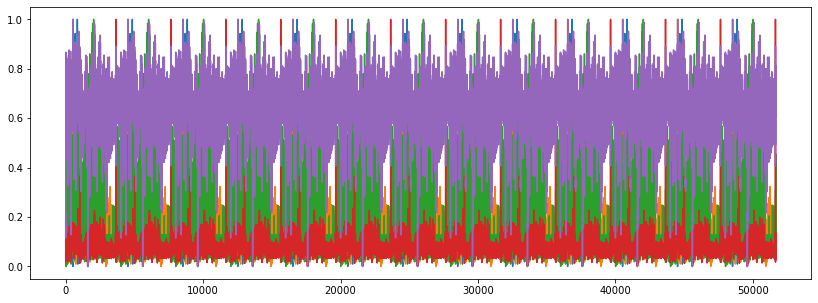

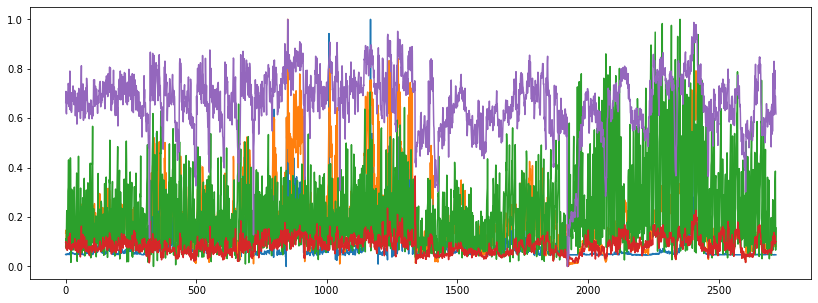

In [25]:
plt.figure(figsize=(14,5))
plt.plot(X_train)
plt.show()

plt.figure(figsize=(14,5))
plt.plot(x_val)
plt.show()

Reshape the data for the LSTM

In [26]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

print(X_train.shape)

(51680, 5, 1)


Build the Sequential model

In [27]:
model = tf.keras.Sequential()
model.add(keras.layers.LSTM(3, input_shape=(k*5, 1)))
model.add(keras.layers.Dense(2, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))
model.output_shape

(None, 2)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3)                 60        
_________________________________________________________________
dense (Dense)                (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [29]:
output = model.layers[1]

Compile the model with early stopping and callbacks; the Adam (Adaptive Moment Estimation) optimizer is used with a learning rate of 0.001.

In [30]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

checkpoint_cb = keras.callbacks.ModelCheckpoint("best.h5", save_best_only=True)

opt = keras.optimizers.Adam(learning_rate = 0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

model.evaluate(x_test, y_test)

300/300 [==============================] - 1s 2ms/step - loss: 0.6796 - accuracy: 0.8352


[0.6796162128448486, 0.8352083563804626]

Fit the model and train

In [31]:
history = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/1000
1615/1615 [==============================] - 6s 3ms/step - loss: 0.5239 - accuracy: 0.7844 - val_loss: 0.4368 - val_accuracy: 0.8419
Epoch 2/1000
1615/1615 [==============================] - 5s 3ms/step - loss: 0.5161 - accuracy: 0.7844 - val_loss: 0.4405 - val_accuracy: 0.8419
Epoch 3/1000
1615/1615 [==============================] - 5s 3ms/step - loss: 0.5155 - accuracy: 0.7844 - val_loss: 0.4402 - val_accuracy: 0.8419
Epoch 4/1000
1615/1615 [==============================] - 5s 3ms/step - loss: 0.5151 - accuracy: 0.7844 - val_loss: 0.4380 - val_accuracy: 0.8419
Epoch 5/1000
1615/1615 [==============================] - 5s 3ms/step - loss: 0.5151 - accuracy: 0.7844 - val_loss: 0.4387 - val_accuracy: 0.8419
Epoch 6/1000
1615/1615 [==============================] - 5s 3ms/step - loss: 0.5150 - accuracy: 0.7844 - val_loss: 0.4375 - val_accuracy: 0.8419
Epoch 7/1000
1615/1615 [==============================] - 6s 4ms/step - loss: 0.5148 - accuracy: 0.7844 - val_loss: 0.4348 -

Epoch 57/1000
1615/1615 [==============================] - 6s 4ms/step - loss: 0.5104 - accuracy: 0.7844 - val_loss: 0.4313 - val_accuracy: 0.8419
Epoch 58/1000
1615/1615 [==============================] - 6s 4ms/step - loss: 0.5103 - accuracy: 0.7844 - val_loss: 0.4287 - val_accuracy: 0.8419
Epoch 59/1000
1615/1615 [==============================] - 6s 4ms/step - loss: 0.5103 - accuracy: 0.7844 - val_loss: 0.4290 - val_accuracy: 0.8419


Plot the model's accuracy and loss

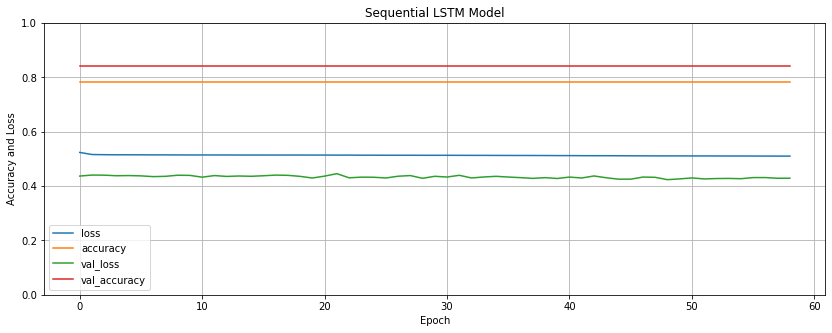

In [32]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(14, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Sequential LSTM Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loss")
plt.show()

Show the accuracy and loss of the validation set

In [33]:
model.evaluate(x_val, y_val)

85/85 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8419


[0.42362454533576965, 0.841911792755127]

Show the accuracy and loss of the testing data

In [34]:
score = model.evaluate(x_test, y_test)

300/300 [==============================] - 1s 2ms/step - loss: 0.4429 - accuracy: 0.8352


In [35]:
#shows time enlapsed for entire program
time_elapsed = time.time() - start
print("time elapsed:", time_elapsed)

time elapsed: 381.50481367111206
